<a href="https://colab.research.google.com/github/ZeeshanAhmed95/MNIST-Classification-Keras/blob/main/MNIST_Classification_using_Sklearn_and_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Approach :**
1. **Load all the libraries and Data**
2. **Data Preparations**
3. **Data Visualization**
4. **Analysis** -
      - ***Sklearn***
           - Perceptron
           - Multi Layer Perceptron

      - ***Keras***  
          - Set the model (sequential/functional): we will use sequential initially

          - Set up the layers: Dense and Dropout

          - Compile the model: Optimizer, Loss function, Batch

          - Fit the model: (x,y, epochs)

          - Predict with the model (validation dataset)







### **Chatgpt doubts Q&A :**

https://chat.openai.com/share/00233780-2750-48d4-8ebf-1ea843c2b97b

###**Articles to refer:**

######**Bias and Variance**: https://www.tutorialspoint.com/difference-between-bias-and-variance-in-machine-learning

###**DAY - 1**

In [24]:
!unzip '/content/digit-recognizer.zip'

Archive:  /content/digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
##########kera libraries and Modules#######
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD,Adam
from tensorflow.keras.utils import to_categorical

In [26]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [27]:
train.skew()

label         0.026479
pixel0        0.000000
pixel1        0.000000
pixel2        0.000000
pixel3        0.000000
               ...    
pixel779    145.149671
pixel780      0.000000
pixel781      0.000000
pixel782      0.000000
pixel783      0.000000
Length: 785, dtype: float64

### **DAY - 2**

https://jamboard.google.com/d/1RLwFWpXLR3PYTXv6UTw9QUYvJcK3rK61SUGYcHjFwgg/viewer

https://www.geeksforgeeks.org/difference-between-loc-and-iloc-in-pandas-dataframe/

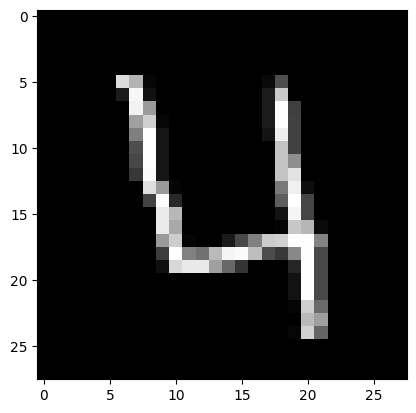

In [28]:
features = ["pixel{}".format(pixel_num) for pixel_num in range(0,784)]
rows_to_examine = 3
image_data = np.reshape(train[features][rows_to_examine:rows_to_examine+1].to_numpy(),(28,28))
plt.imshow(image_data, cmap = "gray")

In [ ]:
features

Break the data into Images and Labels

In [30]:
x = train.iloc[:,1:]
y = train['label']

In [31]:
x

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Train Test Split of Images

In [32]:
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 123 )

In [33]:
per = Perceptron(verbose = 2)
per.fit(x_train,y_train)
per_preds_train = per.predict(x_train)
per_preds_test = per.predict(x_test)

-- Epoch 1
Norm: 33680.40, NNZs: 599, Bias: -92.000000, T: 33600, Avg. loss: 46817.951667
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 42819.49, NNZs: 607, Bias: -161.000000, T: 67200, Avg. loss: 41184.869077
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 48607.75, NNZs: 614, Bias: -222.000000, T: 100800, Avg. loss: 36891.702232
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 54442.08, NNZs: 625, Bias: -281.000000, T: 134400, Avg. loss: 35999.461042
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 58608.01, NNZs: 631, Bias: -333.000000, T: 168000, Avg. loss: 37009.589702
Total training time: 0.27 seconds.
-- Epoch 6
Norm: 61946.25, NNZs: 635, Bias: -383.000000, T: 201600, Avg. loss: 34799.316220
Total training time: 0.33 seconds.
-- Epoch 7
Norm: 65207.63, NNZs: 637, Bias: -432.000000, T: 235200, Avg. loss: 36238.479613
Total training time: 0.39 seconds.
-- Epoch 8
Norm: 68995.89, NNZs: 639, Bias: -476.000000, T: 268800, Avg. loss: 34062.205625
Total training time: 0

In [34]:
def model_eval(actual, predicted):
  conf_matrix = confusion_matrix(actual,predicted)
  clas_rep = classification_report(actual, predicted)
  acc_score = accuracy_score(actual, predicted)
  print("The model accuracy is: ", acc_score)
  print(conf_matrix)
  print(clas_rep)

In [35]:
model_eval(y_train,per_preds_train)

The model accuracy is:  0.8858333333333334
[[3197    0   14    5    2   31   70    1   25    2]
 [   1 3556   20    9    2    5    4    4  130    4]
 [  18    9 2961   70    9   24   34   16  193    5]
 [  19   10   83 3022    1  142   27   16  152   21]
 [   5    8  123   17 2912   19   38   17  103   34]
 [  27    3   16   78   19 2525   96    7  194   30]
 [  13    5   28    3    5   45 3122    0   46    0]
 [   7    6  134   17    7    7    6 3269   40   48]
 [  18   20   38   53    8   92   17   10 2978   12]
 [  19   15  120   63  188  119    8  298  309 2222]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3347
           1       0.98      0.95      0.97      3735
           2       0.84      0.89      0.86      3339
           3       0.91      0.87      0.88      3493
           4       0.92      0.89      0.91      3276
           5       0.84      0.84      0.84      2995
           6       0.91      0.96      0.93    

Multi layer Perceptron

In [48]:
mlp = MLPClassifier(hidden_layer_sizes = (16,16,16), verbose = True)

In [49]:
mlp.fit(x_train,y_train)

Iteration 1, loss = 4.11606515
Iteration 2, loss = 1.35106932
Iteration 3, loss = 0.96891549
Iteration 4, loss = 0.76976554
Iteration 5, loss = 0.64620477
Iteration 6, loss = 0.56576485
Iteration 7, loss = 0.50371787
Iteration 8, loss = 0.45999893
Iteration 9, loss = 0.43200894
Iteration 10, loss = 0.40927038
Iteration 11, loss = 0.39038620
Iteration 12, loss = 0.37597545
Iteration 13, loss = 0.36006258
Iteration 14, loss = 0.34885386
Iteration 15, loss = 0.33655895
Iteration 16, loss = 0.32654999
Iteration 17, loss = 0.31267677
Iteration 18, loss = 0.30239592
Iteration 19, loss = 0.29523012
Iteration 20, loss = 0.28985849
Iteration 21, loss = 0.27901676
Iteration 22, loss = 0.27460349
Iteration 23, loss = 0.26838081
Iteration 24, loss = 0.26296596
Iteration 25, loss = 0.26194650
Iteration 26, loss = 0.25804088
Iteration 27, loss = 0.25175613
Iteration 28, loss = 0.24637454
Iteration 29, loss = 0.24423118
Iteration 30, loss = 0.23924185
Iteration 31, loss = 0.23685300
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(16, 16, 16), verbose=True)

In [50]:
preds_mlp_train = mlp.predict(x_train)
preds_mlp_test = mlp.predict(x_test)

In [51]:
model_eval(y_train, preds_mlp_train)

The model accuracy is:  0.9784821428571429
[[3312    0    1    1    0    6    5    0   22    0]
 [   0 3717    4    4    1    0    0    3    5    1]
 [   1   11 3253   17   13    4    9    9   15    7]
 [   0    0   32 3291    2   59    5   26   55   23]
 [   1    0    9    0 3241    0    8    7    0   10]
 [   8    0    1    9    4 2948    6    0    5   14]
 [   4    0    1    0    2    5 3238    0   17    0]
 [   0   10   18    5    1    2    0 3492    1   12]
 [   6    8    2   20    1   15    7    1 3172   14]
 [   2    4    0   21   40   11    0   38   32 3213]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3347
           1       0.99      1.00      0.99      3735
           2       0.98      0.97      0.98      3339
           3       0.98      0.94      0.96      3493
           4       0.98      0.99      0.98      3276
           5       0.97      0.98      0.98      2995
           6       0.99      0.99      0.99    

In [52]:
model_eval(y_test, preds_mlp_test)

The model accuracy is:  0.9229761904761905
[[744   0   4   2   3   5  18   5   3   1]
 [  0 922   6   6   1   2   1   2   8   1]
 [  1   9 762  25  11   4   6   9  11   0]
 [  1   0  14 762   0  35   2  12  21  11]
 [  1   2   5   0 743   0  10   8   1  26]
 [ 10   3   2  34   5 714  10   1  12   9]
 [  5   4   6   2   0  19 827   0   7   0]
 [  2   8  10   8   6   2   0 800   6  18]
 [  3  15   3  10   2  22   7   3 743   9]
 [  5   1   0   2  40  12   0  25   6 736]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       785
           1       0.96      0.97      0.96       949
           2       0.94      0.91      0.92       838
           3       0.90      0.89      0.89       858
           4       0.92      0.93      0.92       796
           5       0.88      0.89      0.88       800
           6       0.94      0.95      0.94       870
           7       0.92      0.93      0.93       860
           8       0.91      0.91      

# Keras Implementation

Approach to creating models in Keras

1.   Initializing a model
     1. Sequential Model (Sequence of Layers)
     2. Functional Model (Multi modal, Transfer Learning)
2.   Set up the layers
     1. Dense Layers, Fully Connected Layers, MLP
     2. Dropout (Avoids overfitting)
3.   Compilation
     1. Optimizer (SGD, ADAM)
     2. Loss Function (Regression Loss Functions, Classification Loss Func)
     3. Metrics (Accuracy)
4.   Model Fit
     1. X & Y (Train and Test)
     2. Epochs (Number of iterations)
     3. Batch_Size = 128, 256 - Batch of images



In [55]:
model = Sequential()
model.add(Dense(8, activation = 'relu', input_shape = (784,)))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 6280      
                                                                 
 dense_13 (Dense)            (None, 8)                 72        
                                                                 
 dense_14 (Dense)            (None, 8)                 72        
                                                                 
 dense_15 (Dense)            (None, 10)                90        
                                                                 
Total params: 6514 (25.45 KB)
Trainable params: 6514 (25.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
model.compile(optimizer = 'Adam', loss = 'CategoricalCrossentropy', metrics = ['accuracy'])

In [58]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [59]:
print(y_train_ohe.shape)
print(y_test_ohe.shape)

(33600, 10)
(8400, 10)


In [46]:
y_train_ohe

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

Understanding verbose:
https://chat.openai.com/share/f638075c-8ab0-4d0d-acc9-0db9b79f3f62

In [61]:
hist = model.fit(x_train, y_train_ohe, validation_data=(x_test, y_test_ohe), epochs = 250, verbose=2)

Epoch 1/250
1050/1050 - 2s - loss: 0.8838 - accuracy: 0.7192 - val_loss: 0.8844 - val_accuracy: 0.7229 - 2s/epoch - 2ms/step
Epoch 2/250
1050/1050 - 2s - loss: 0.8607 - accuracy: 0.7258 - val_loss: 0.8492 - val_accuracy: 0.7354 - 2s/epoch - 2ms/step
Epoch 3/250
1050/1050 - 2s - loss: 0.8488 - accuracy: 0.7292 - val_loss: 0.8420 - val_accuracy: 0.7352 - 2s/epoch - 2ms/step
Epoch 4/250
1050/1050 - 2s - loss: 0.8378 - accuracy: 0.7360 - val_loss: 0.8225 - val_accuracy: 0.7436 - 2s/epoch - 2ms/step
Epoch 5/250
1050/1050 - 3s - loss: 0.8223 - accuracy: 0.7402 - val_loss: 0.8254 - val_accuracy: 0.7444 - 3s/epoch - 3ms/step
Epoch 6/250
1050/1050 - 4s - loss: 0.8093 - accuracy: 0.7453 - val_loss: 0.8206 - val_accuracy: 0.7462 - 4s/epoch - 3ms/step
Epoch 7/250
1050/1050 - 2s - loss: 0.8184 - accuracy: 0.7431 - val_loss: 0.8343 - val_accuracy: 0.7462 - 2s/epoch - 2ms/step
Epoch 8/250
1050/1050 - 3s - loss: 0.8036 - accuracy: 0.7479 - val_loss: 0.8277 - val_accuracy: 0.7510 - 3s/epoch - 2ms/step


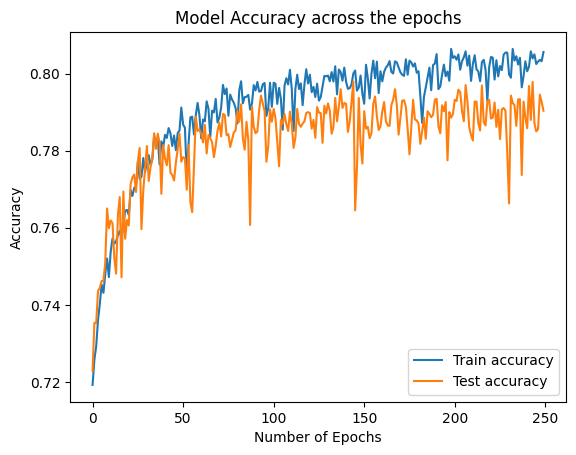

In [62]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy across the epochs')
plt.legend(["Train accuracy", "Test accuracy"])
plt.show()

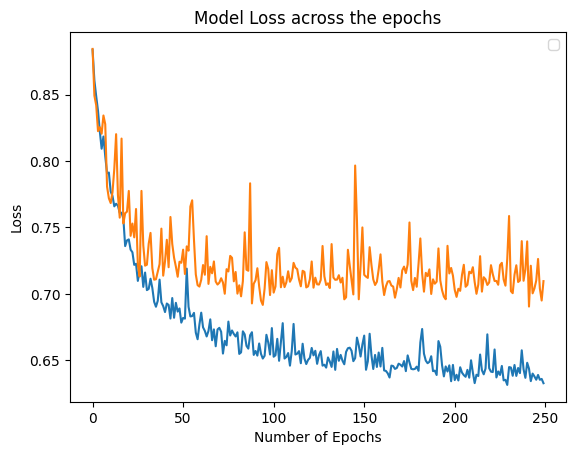

In [63]:
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Model Loss across the epochs')
plt.legend(["Train Loss", "Test Loss"])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])